<a href="https://colab.research.google.com/github/mertmisirli/1_Tensorflow/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


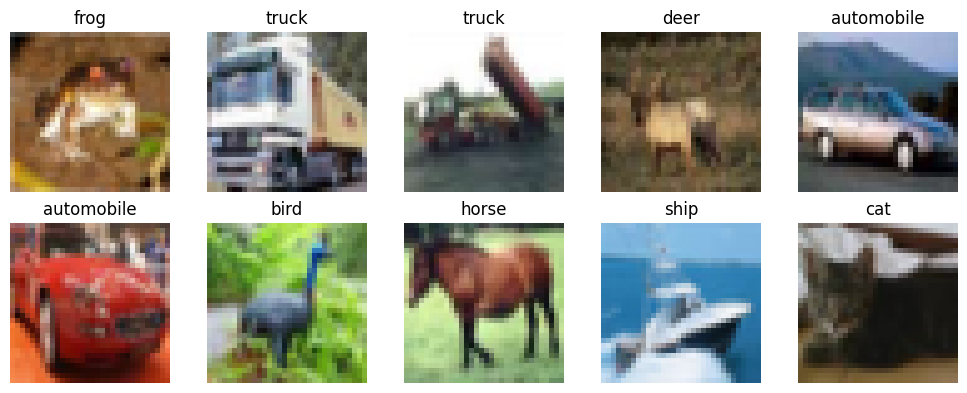

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,4))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.title(class_names[y_train[i][0]])
  plt.axis('off')
plt.tight_layout()
plt.show()

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [6]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_split=0.2, batch_size=64)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 98ms/step - accuracy: 0.3276 - loss: 1.8111 - val_accuracy: 0.5262 - val_loss: 1.3267
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 96ms/step - accuracy: 0.5524 - loss: 1.2515 - val_accuracy: 0.6080 - val_loss: 1.1204
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 96ms/step - accuracy: 0.6224 - loss: 1.0688 - val_accuracy: 0.6301 - val_loss: 1.0531
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 96ms/step - accuracy: 0.6681 - loss: 0.9495 - val_accuracy: 0.6664 - val_loss: 0.9497
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 95ms/step - accuracy: 0.7018 - loss: 0.8573 - val_accuracy: 0.6862 - val_loss: 0.9037
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.7260 - loss: 0.7955 - val_accuracy: 0.6959 - val_loss: 0.8779
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 96ms/step - accuracy: 0.7509 - loss: 0.7182 - val_accuracy: 0.7121 - val_loss: 0.8407
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.7720 - loss: 0.6608 - 

In [7]:
# Test verisiyle değerlendir
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n🎯 Test Doğruluğu: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7092 - loss: 0.8872

🎯 Test Doğruluğu: 0.7036


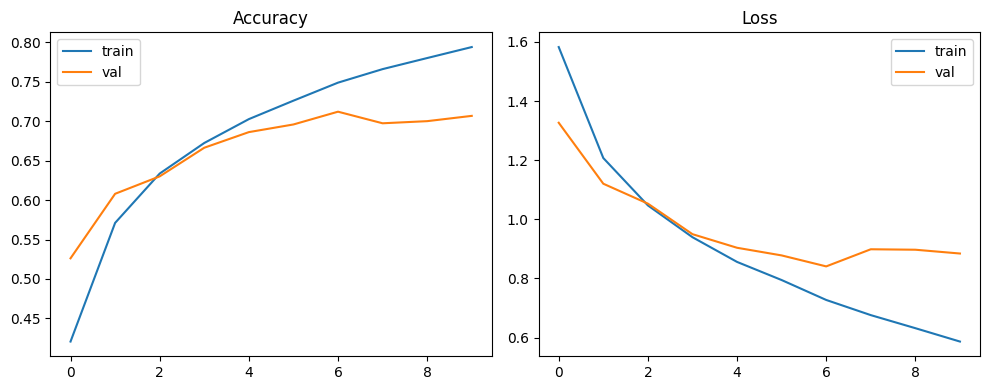

In [8]:
# Başarı grafiği
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


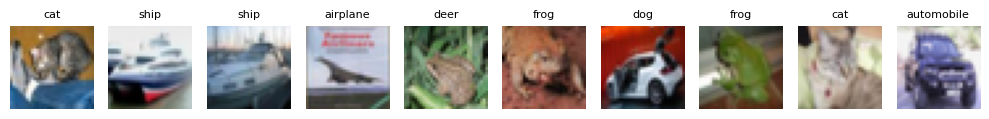

In [9]:
# Örnek tahminler göster
predictions = model.predict(x_test[:10])
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i])
    pred_label = np.argmax(predictions[i])
    plt.title(class_names[pred_label], fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [17]:
from tensorflow.keras.preprocessing import image

# Görseli yükle (örnek olarak test.jpg)
img_path = "car.jpg"  # ← buraya kendi görselinin yolunu yaz
img = image.load_img(img_path, target_size=(32, 32))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


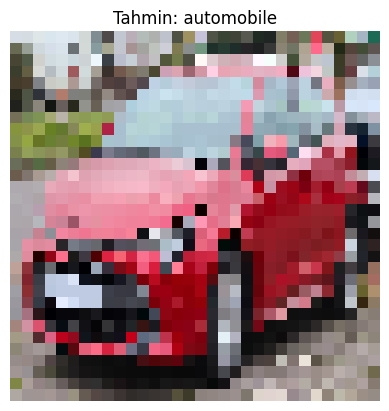

In [18]:
img_array = image.img_to_array(img) / 255.0  # normalize
img_batch = np.expand_dims(img_array, axis=0)  # shape: (1,32,32,3)

# Tahmin yap
pred = model.predict(img_batch)
pred_class = class_names[np.argmax(pred)]

# Sonucu göster
plt.imshow(img_array)
plt.title(f"Tahmin: {pred_class}")
plt.axis("off")
plt.show()